# Guided Project: Predicting Heart Disease
We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future.

The dataset has the following features:
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

First, we read heart_disease_prediction.csv into a pandas dataframe and show some infomation of it.

In [184]:
df = pd.read_csv('heart_disease_prediction.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [185]:
df.shape

(918, 12)

In [186]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

We use **df.dtypes** to see the data type of each of columns.

In [187]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From the descriptive statistics for the DataFrame above, we can see that 

*  The average age of the patients is 53.51089 year-old.
* RestingBP and Cholesterol have a minimum value of zero (That's not true.)

In [188]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We use **df.isnull().sum()** to see the number of missing values in each features or target.

So, we can see that we have no missing value.

0    704
1    214
Name: FastingBS, dtype: int64


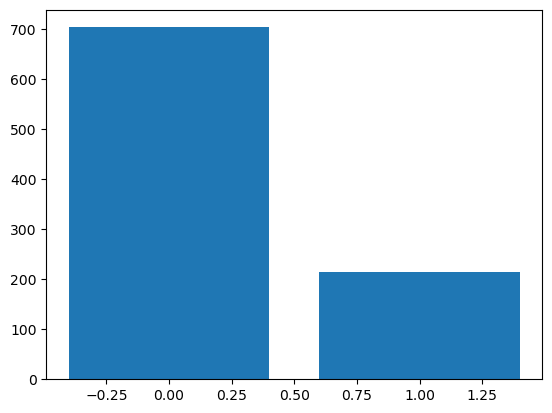

In [189]:
fastingbs_stat = df['FastingBS'].value_counts()
print(fastingbs_stat)
plt.bar(fastingbs_stat.index, fastingbs_stat)
plt.show()

Next we count the number of rows that have a 0 value for RestingBP and count the number of rows that have a 0 value for Cholesterol

After that we can
* Remove those rows from the dataset, or
* Replace those values with the median value of the corresponding column and the corresponding HeartDisease value.

In [190]:
df[df['RestingBP'] == 0].shape[0]

1

In [191]:
df[df['Cholesterol'] == 0].shape[0]

172

In [192]:
df = df.drop(df[df['RestingBP'] == 0].index)
print(df[df['RestingBP'] == 0].shape[0])

0


In [193]:
df = df.drop(df[df['Cholesterol'] == 0].index)
print(df[df['Cholesterol'] == 0].shape[0])

0


In [194]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [195]:
corr = abs(df.corr()['HeartDisease'])
corr = corr.sort_values(ascending=False)
corr_top5 = corr[1:6]
corr_top5

ST_Slope_Up         0.653759
ST_Slope_Flat       0.591554
ExerciseAngina_Y    0.551834
Oldpeak             0.495696
MaxHR               0.377212
Name: HeartDisease, dtype: float64

In [196]:
features = corr_top5.index
features

Index(['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak', 'MaxHR'], dtype='object')

In [197]:
X = df[features]
y = df['HeartDisease']
X

,ST_Slope_Up,ST_Slope_Flat,ExerciseAngina_Y,Oldpeak,MaxHR
0,1,0,0,0.0,172
1,0,1,0,1.0,156
2,1,0,0,0.0,98
3,0,1,1,1.5,108
4,1,0,0,0.0,122
...,...,...,...,...,...
913,0,1,0,1.2,132
914,0,1,0,3.4,141
915,0,1,1,1.2,115
916,0,1,0,0.0,174


In [198]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.25, random_state=42)

In [199]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acc = knn.score(X_val, y_val)
acc

0.8125

But before we do, it's important to note that our features are not yet normalized. Not all of the values are within the same range. We will first scale our data to the range (0, 1) before training our model. Note: We will only scale our selected features.

In [200]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

In [201]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
acc = knn.score(X_val_scaled, y_val)
acc

0.8571428571428571

In [202]:
grid_params = {'n_neighbors': range(1,10),
              "metric": ["minkowski", "manhattan"]}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
acc = knn_grid.best_estimator_.score(X_val_scaled, y_val)
acc

0.8392857142857143

In [203]:
# Print out the best score and the best parameters obtained from the grid search
print(f'Best score(Accuracy): {knn_grid.best_score_}')
print(f'Best params: {knn_grid.best_params_}')

Best score(Accuracy): 0.8473669467787115
Best params: {'metric': 'minkowski', 'n_neighbors': 7}


## Model Evaluation on Test Set

In [204]:
X_test_scaled = scaler.fit_transform(X_test)
acc = knn_grid.best_estimator_.score(X_test_scaled, y_test)
acc

0.7894736842105263